In [ ]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
# fetch the training file
file_path_20_percent = 'KDDTrain+_20Percent.txt'
file_path_full_training_set = 'KDDTrain+.txt'
file_path_test = 'KDDTest+.txt' 

#df = pd.read_csv(file_path_20_percent)
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [ ]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

# sanity check
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [ ]:
np.shape(df)

(125972, 44)

In [ ]:
set(df['protocol_type'])

{'icmp', 'tcp', 'udp'}

In [ ]:
set(df['attack'])

{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'loadmodule',
 'multihop',
 'neptune',
 'nmap',
 'normal',
 'perl',
 'phf',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'spy',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [ ]:
set(df['service'])

{'IRC',
 'X11',
 'Z39_50',
 'aol',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'harvest',
 'hostnames',
 'http',
 'http_2784',
 'http_443',
 'http_8001',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'red_i',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tftp_u',
 'tim_i',
 'time',
 'urh_i',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois'}

In [ ]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [ ]:
set(df['attack_map'])

{0, 1, 2, 3, 4}

In [ ]:
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs   

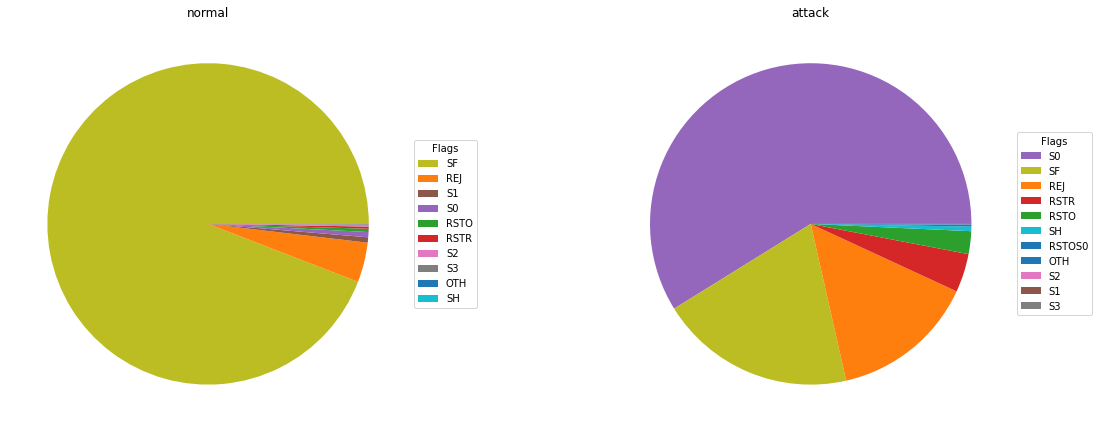

In [ ]:
# # get a series with the count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()

# # create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

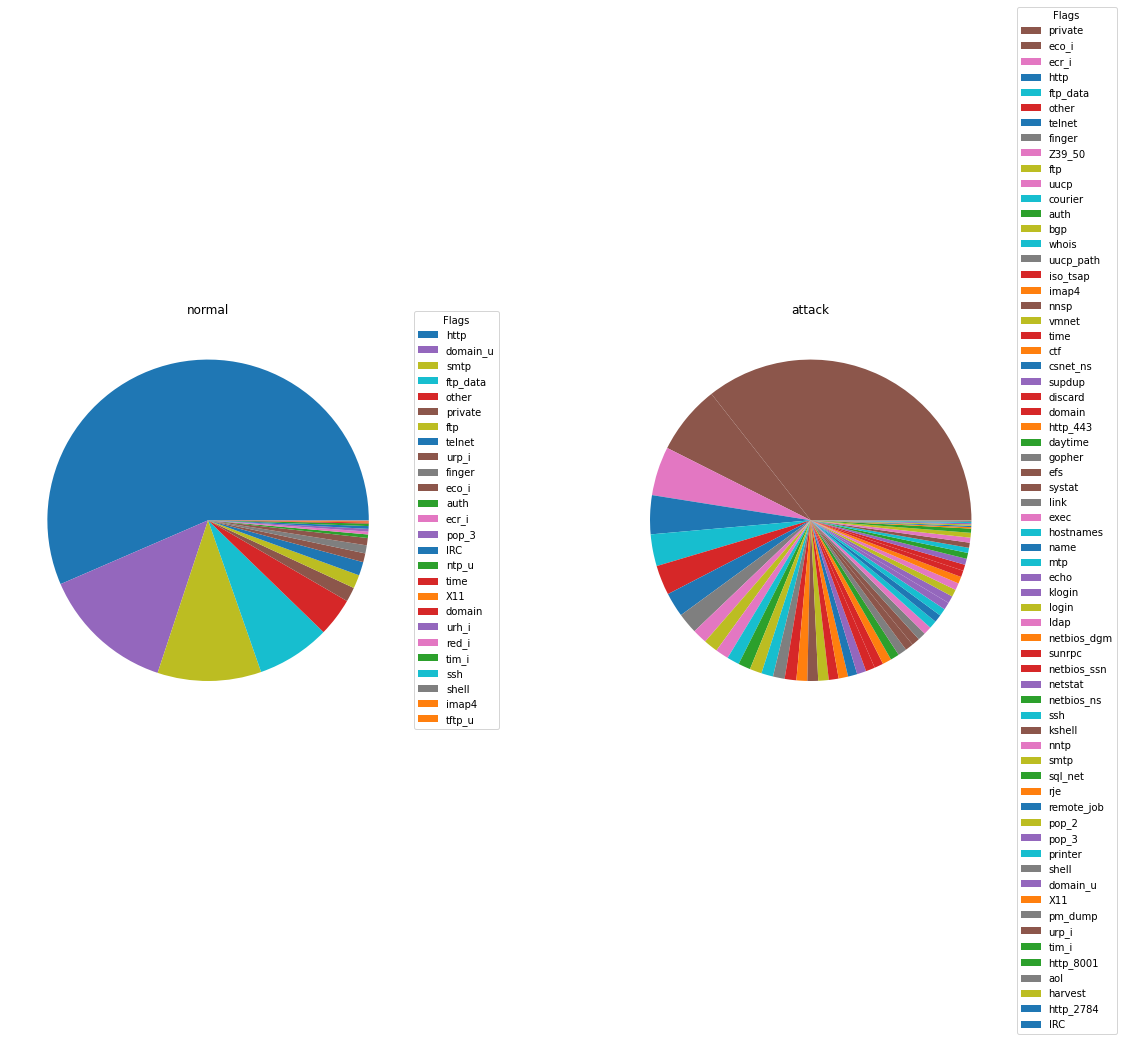

In [ ]:
# # get a series with the count of each service for attack and normal traffic
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])        
plt.show()


In [ ]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(df[numeric_features])
test_set = test_final.join(test_df[numeric_features])

In [ ]:
# create our target classifications
binary_y = df['attack_flag']
multi_y = df['attack_map']

test_binary_y = test_df['attack_flag']
test_multi_y = test_df['attack_map']

# build the training sets
binary_train_X, binary_val_X, binary_train_y, binary_val_y = train_test_split(to_fit, binary_y, test_size=0.6)
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(to_fit, multi_y, test_size = 0.6)

In [ ]:
binary_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50388 entries, 40665 to 31423
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   protocol_type_icmp   50388 non-null  uint8
 1   protocol_type_tcp    50388 non-null  uint8
 2   protocol_type_udp    50388 non-null  uint8
 3   service_IRC          50388 non-null  uint8
 4   service_X11          50388 non-null  uint8
 5   service_Z39_50       50388 non-null  uint8
 6   service_aol          50388 non-null  uint8
 7   service_auth         50388 non-null  uint8
 8   service_bgp          50388 non-null  uint8
 9   service_courier      50388 non-null  uint8
 10  service_csnet_ns     50388 non-null  uint8
 11  service_ctf          50388 non-null  uint8
 12  service_daytime      50388 non-null  uint8
 13  service_discard      50388 non-null  uint8
 14  service_domain       50388 non-null  uint8
 15  service_domain_u     50388 non-null  uint8
 16  service_echo      

In [ ]:
binary_train_X.sample(5)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,duration,src_bytes,dst_bytes
116236,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
104871,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
70043,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,331,1972
98491,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11061,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
X_train = binary_train_X
y_train = binary_train_y
X_test = binary_val_X
y_test = binary_val_y

# **AdaBoost**

In [ ]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(binary_train_X, binary_train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [ ]:
predictions = classifier.predict(binary_val_X)

Confusion matrix, without normalization


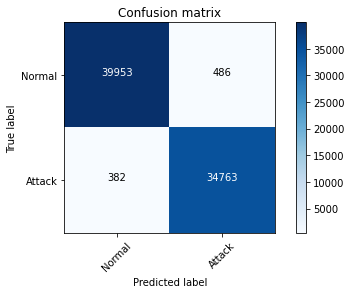

In [ ]:
cm = metrics.confusion_matrix(binary_val_y, predictions)
plot_confusion_matrix(cm, classes=['Normal', 'Attack'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
adaboost_recall = recall_score(y_test, predictions)
adaboost_precision = precision_score(y_test, predictions)
adaboost_f1 = f1_score(y_test, predictions)
print(adaboost_recall, adaboost_precision, adaboost_f1)

0.9891307440603215 0.9862123748191438 0.9876694036423559


In [ ]:
adaboost_accuracy = accuracy_score(y_test, predictions)

# **KNN**

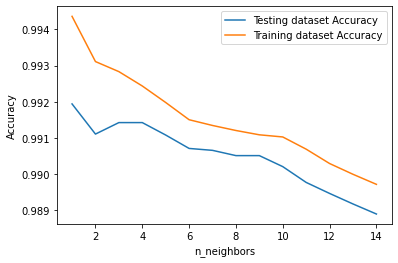

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(binary_train_X, binary_train_y)

#print(knn.predict(binary_val_X))
print("Accuracy over test dataset = ", knn.score(binary_val_X, binary_val_y))


Accuracy over test dataset =  0.9914267569856055


From the above graph, we can conclude that **k=3** will give the highest accuracy for knn model over test dataset.

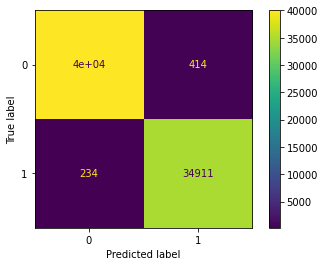

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test), labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
knn_recall = recall_score(y_test, knn.predict(X_test))
knn_precision = precision_score(y_test, knn.predict(X_test))
knn_f1 = f1_score(y_test, knn.predict(X_test))
print(knn_recall, knn_precision, knn_f1)

0.9933418693982075 0.98828025477707 0.9908045977011495


In [ ]:
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))

# **Decision Tree**

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test).astype(int)
print("Accuracy over test data = ", metrics.accuracy_score(y_test, y_pred))

Accuracy over test data =  0.948520850973751


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40384    55]
 [ 3836 31309]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     40439
           1       1.00      0.89      0.94     35145

    accuracy                           0.95     75584
   macro avg       0.96      0.94      0.95     75584
weighted avg       0.95      0.95      0.95     75584



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
dt_recall = recall_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
print(dt_recall, dt_precision, dt_f1)

0.8908521838099303 0.9982463971432215 0.9414966395525417


In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred)

# **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Accuracy over test data = ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
plot_confusion_matrix(gnb, X_test, y_test)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

print("Accuracy over test data = ", metrics.accuracy_score(y_test, y_pred))

Accuracy over test data =  0.9929614733276884


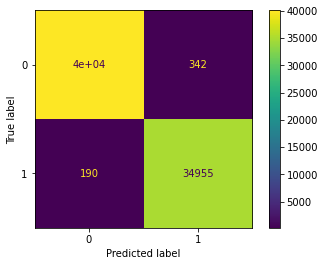

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
print(rf_recall, rf_precision, rf_f1)

0.9945938255797411 0.9903107912853784 0.9924476874591863


In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)

# **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='rbf') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy over test data = ", metrics.accuracy_score(y_test, y_pred))

# **Ensemble**

In [ ]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=f51e0437aa21dd33d06d87b63d1064ecd2bbced93ee98efc16980da291c424b6
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [ ]:
print(type(y_train))
y_train.shape

<class 'pandas.core.series.Series'>


(50388,)

# **ENSEMBLE MODEL**

In [ ]:
from vecstack import stacking
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six

from mlxtend.classifier import StackingClassifier

model_1 = classifier #adaboost
model_2 = knn #knn
model_3 = clf #random forest
model_4 = regressor #decision tree
# putting all base model objects in one list
all_models = [model_2, model_3, model_4]

clf_stack = StackingClassifier(classifiers =all_models, meta_classifier = model_1, average_probas = True, use_features_in_secondary = True)

model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test)  

acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)


accuracy score of Stacked model: 99.26571761219306


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
stacked_recall = recall_score(y_test, pred_stack)
stacked_precision = precision_score(y_test, pred_stack)
stacked_f1 = f1_score(y_test, pred_stack)
print(stacked_recall, stacked_precision, stacked_f1)

0.9945938255797411 0.9896659116647791 0.9921237493791243


In [ ]:
stacked_accuracy = accuracy_score(y_test, pred_stack)
print(stacked_accuracy)

0.9926571761219306


# **VISUALIZATION**

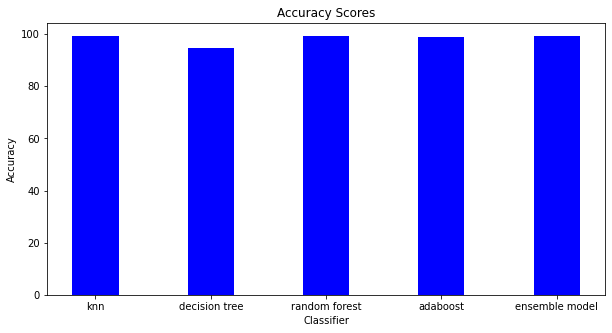

[99.14267569856054, 94.85208509737511, 99.29614733276884, 98.85160880609652, 99.26571761219306]


In [ ]:
#accuracy scores
accuracy_scores = ["knn", "decision tree", "random forest", "adaboost", "ensemble model"]
scores = [knn_accuracy*100, dt_accuracy*100, rf_accuracy*100, adaboost_accuracy*100, stacked_accuracy*100]
fig = plt.figure(figsize = (10, 5))
plt.bar(accuracy_scores, scores, color ='blue', width = 0.4)
 
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores")
plt.show()
print(scores)

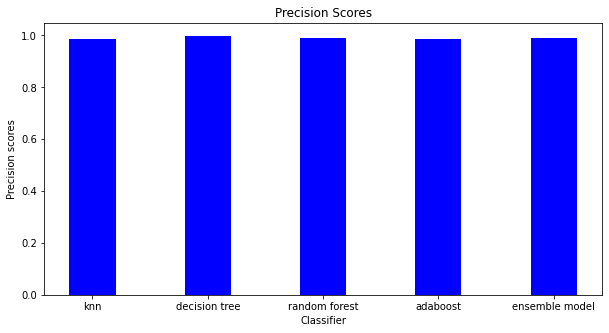

[0.98828025477707, 0.9982463971432215, 0.9903107912853784, 0.9862123748191438, 0.9896659116647791]


In [ ]:
#precision scores
algos = ["knn", "decision tree", "random forest", "adaboost", "ensemble model"]
scores = [knn_precision, dt_precision, rf_precision, adaboost_precision, stacked_precision]
fig = plt.figure(figsize = (10, 5))
plt.bar(algos, scores, color ='blue', width = 0.4)
 
plt.xlabel("Classifier")
plt.ylabel("Precision scores")
plt.title("Precision Scores")
plt.show()
print(scores)

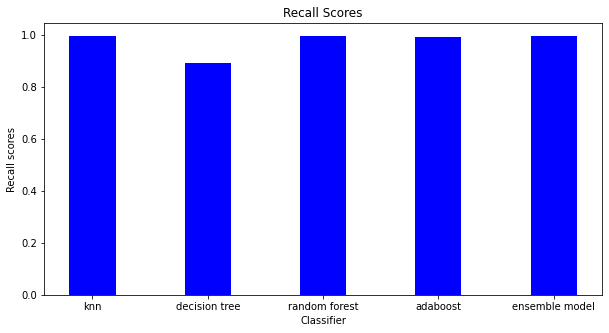

[0.9933418693982075, 0.8908521838099303, 0.9945938255797411, 0.9891307440603215, 0.9945938255797411]


In [ ]:
#recall scores
algos = ["knn", "decision tree", "random forest", "adaboost", "ensemble model"]
scores = [knn_recall, dt_recall, rf_recall, adaboost_recall, stacked_recall]
fig = plt.figure(figsize = (10, 5))
plt.bar(algos, scores, color ='blue', width = 0.4)
 
plt.xlabel("Classifier")
plt.ylabel("Recall scores")
plt.title("Recall Scores")
plt.show()
print(scores)

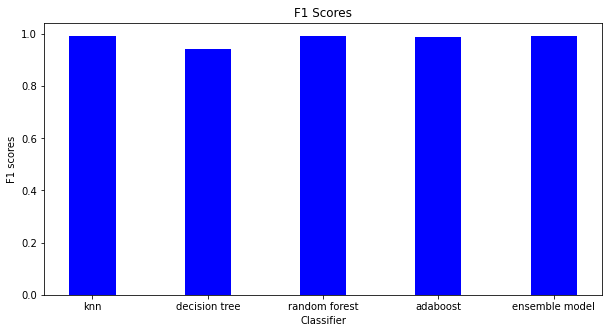

[0.9908045977011495, 0.9414966395525417, 0.9924476874591863, 0.9876694036423559, 0.9921237493791243]


In [ ]:
#f1 scores
algos = ["knn", "decision tree", "random forest", "adaboost", "ensemble model"]
scores = [knn_f1, dt_f1, rf_f1, adaboost_f1, stacked_f1]
fig = plt.figure(figsize = (10, 5))
plt.bar(algos, scores, color ='blue', width = 0.4)
 
plt.xlabel("Classifier")
plt.ylabel("F1 scores")
plt.title("F1 Scores")
plt.show()
print(scores)